In [1]:
import sys
!{sys.executable} -m pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
results = pd.read_csv("boxplot.csv")

In [3]:
results.head()

,Project Name,Count packages,Sum LOC,Average LOC,Pareto category,Language
0,4pr0n_ripme,9,12103,94.554688,30,Java
1,abel533_ECharts,14,18196,127.244755,20,Java
2,abel533_Mapper,61,23498,42.646098,30,Java
3,abrensch_brouter,11,19460,104.623656,40,Java
4,acciente_oacc-core,13,46785,182.042802,20,Java


In [4]:
results['Sum LOC in K'] = results['Sum LOC']/1000

In [5]:
filteredData = results[results['Pareto category'] <= 60]

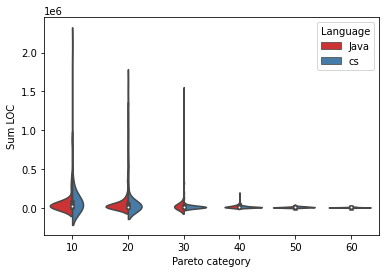

In [6]:
sns.violinplot(x="Pareto category", y="Sum LOC", data=filteredData, hue='Language', split=True, palette='Set1')

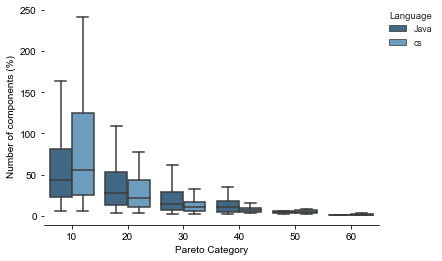

In [7]:
plot = sns.boxplot(x="Pareto category", y="Count packages", hue="Language", 
                    data=filteredData, palette="Blues_d", showfliers = False)

sns.set_context("paper", font_scale=1)
sns.set_style("whitegrid") # option "dark" too

# f, ax = plt.subplots(1, 1)
plt.rcParams['font.family'] = "Arial"
plt.xlabel('Pareto Category', fontsize = 10)
plt.ylabel('Number of projects (%)', fontsize = 10)

sns.despine(left=True)
plot.set(ylabel='Number of components (%)') # per project/repo
plot.legend(frameon=False, title='Language', labelspacing=0.75)

plot.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., frameon=False, title='Language', labelspacing=0.5)

plt.savefig("figure_box.pdf", bbox_inches='tight')


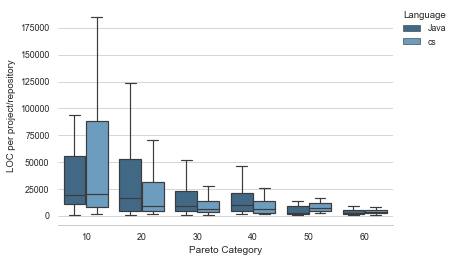

In [8]:
plot = sns.boxplot(x="Pareto category", y="Sum LOC", hue="Language", 
                    data=filteredData, palette="Blues_d", showfliers = False)

sns.set_context("paper", font_scale=1)
sns.set_style("whitegrid") # option "dark" too

# f, ax = plt.subplots(1, 1)
plt.rcParams['font.family'] = "Arial"
plt.xlabel('Pareto Category', fontsize = 10)
# plt.ylabel('LOC per project/repository', fontsize = 10)

sns.despine(left=True)
plot.set(ylabel='LOC per project/repository')
plot.legend(frameon=False, title='Language', labelspacing=0.75)

plot.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., frameon=False, title='Language', labelspacing=0.5)

plt.savefig("figure_box_loc.pdf", bbox_inches='tight')

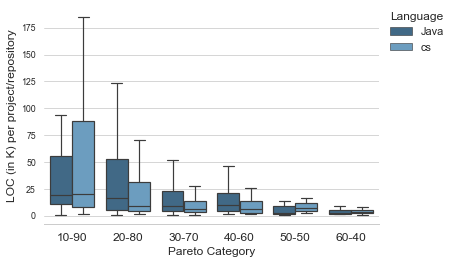

In [9]:
plot = sns.boxplot(x="Pareto category", y="Sum LOC in K", hue="Language", 
                    data=filteredData, palette="Blues_d", showfliers = False)

sns.set_context("paper", font_scale=1)
#sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style("whitegrid") # option "dark" too
sns.set(font_scale = 1)
plt.rcParams['font.family'] = "Arial"
plt.xlabel('Pareto Category', fontsize = 12)
plt.ylabel('LOC (in K) per project/repository', fontsize = 12)

sns.despine(left=True)
plot.set(ylabel='LOC (in K) per project/repository')
plot.set_xticklabels(['10-90', '20-80', '30-70', '40-60', '50-50', '60-40'], fontsize=12)
plot.legend(frameon=False, title='Language', labelspacing=0.75, fontsize = 12)

plot.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., frameon=False, title='Language', labelspacing=0.5)

plt.savefig("boxplot.pdf", bbox_inches='tight')